# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/orange-quality/Orange Quality Data.csv')

**Size: Size of orange in cm**

**Weight: Weight of orange in g**

**Brix: Sweetness level in Brix**

**pH: Acidity level (pH)**

**Softness: Softness rating (1-5)**

**HarvestTime: Days since harvest**

**Ripeness: Ripeness rating (1-5)**

**Color: Fruit color**

**Variety: Orange variety**

**Blemishes: Presence of blemishes (Yes/No)** 

**Quality: Overall quality rating (1-5)**

# Explore the Data

In [3]:
df.shape

(241, 11)

In [4]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


**No Missing Value**

In [6]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

<h2>The Data are Clean<h2>

# Analysis and Visualization 

In [9]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [10]:
color = df['Color'].value_counts().reset_index()
color

,Color,count
0,Deep Orange,75
1,Light Orange,64
2,Orange-Red,55
3,Orange,38
4,Yellow-Orange,9


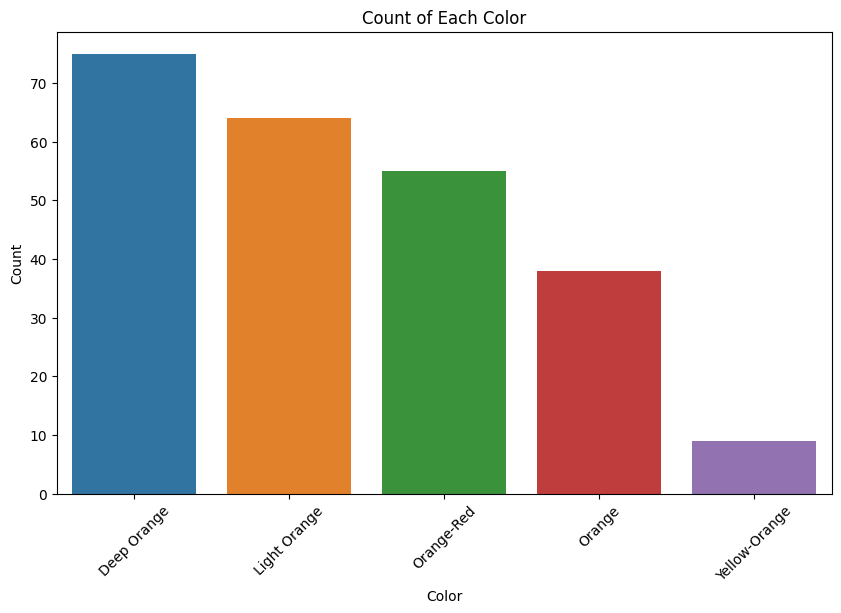

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Color', y='count', data=color)
plt.title('Count of Each Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This Graph show the number of orange's colors in each one**


In [12]:
Variety = df['Variety'].value_counts().reset_index()
Variety

,Variety,count
0,Cara Cara,21
1,Temple,18
2,Star Ruby,18
3,Navel,16
4,Moro (Blood),16
5,Tangerine,14
6,Clementine,14
7,Washington Navel,14
8,Satsuma Mandarin,13
9,Ortanique (Hybrid),13


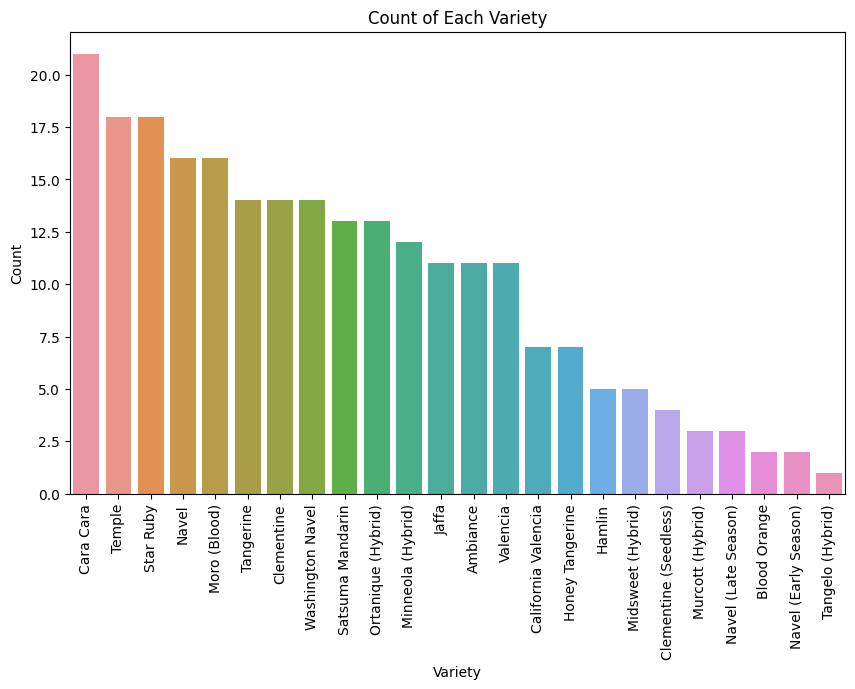

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Variety', y='count', data=Variety)
plt.title('Count of Each Variety')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph show the number of each Variety from orange**

In [14]:
Blemishes = df['Blemishes (Y/N)'].value_counts().reset_index()
Blemishes

,Blemishes (Y/N),count
0,N,149
1,Y (Sunburn Patch),23
2,Y (Scars),17
3,Y (Minor),14
4,Y (Mold Spot),10
5,Y (Bruising),9
6,Y (Split Skin),8
7,Y (Minor Insect Damage),6
8,Y (Sunburn),2
9,Y (Bruise),1


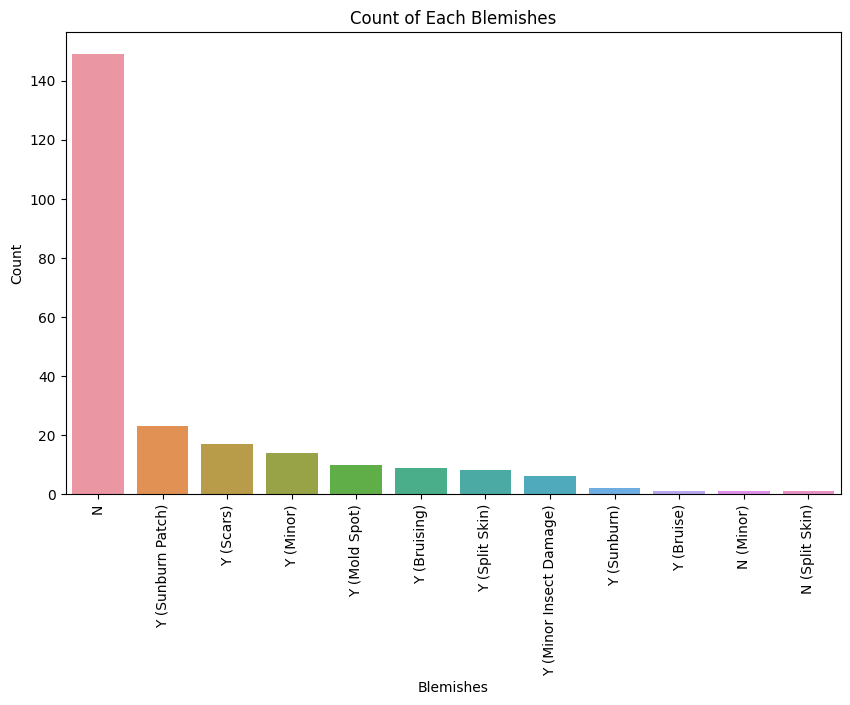

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Blemishes (Y/N)', y='count', data=Blemishes)
plt.title('Count of Each Blemishes')
plt.xlabel('Blemishes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Each column shows the orange's defects, what the defect is, and the number of oranges that contain this defect**


In [16]:
Quality = df['Quality (1-5)'].value_counts().reset_index()
Quality

,Quality (1-5),count
0,4.0,76
1,5.0,52
2,4.5,29
3,3.0,26
4,3.5,23
5,2.0,14
6,2.5,12
7,1.0,9


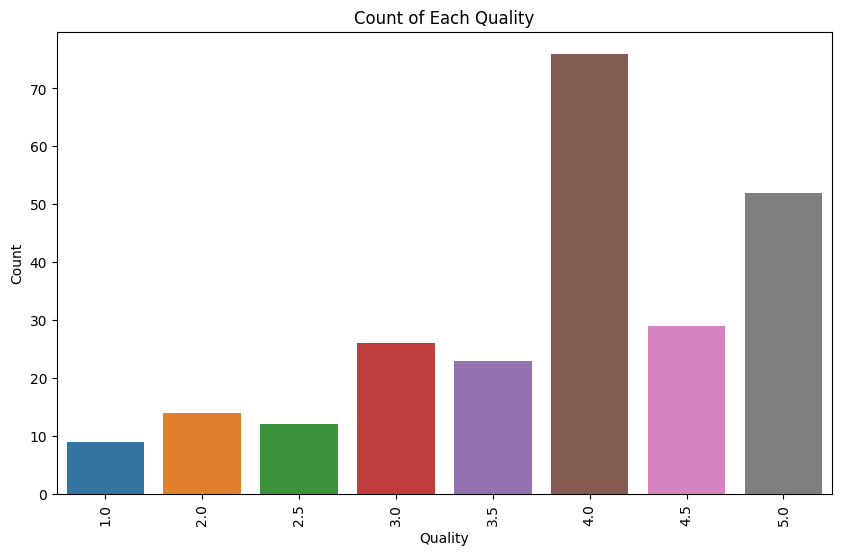

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quality (1-5)', y='count', data=Quality)
plt.title('Count of Each Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**this graph show the number for every orange have more Quality and we can see the biggest Quality of orange is 4.0**


In [18]:
Ripeness = df['Ripeness (1-5)'].value_counts().reset_index()
Ripeness

,Ripeness (1-5),count
0,5.0,58
1,4.0,52
2,3.0,46
3,2.0,27
4,4.5,23
5,1.0,17
6,3.5,12
7,2.5,6


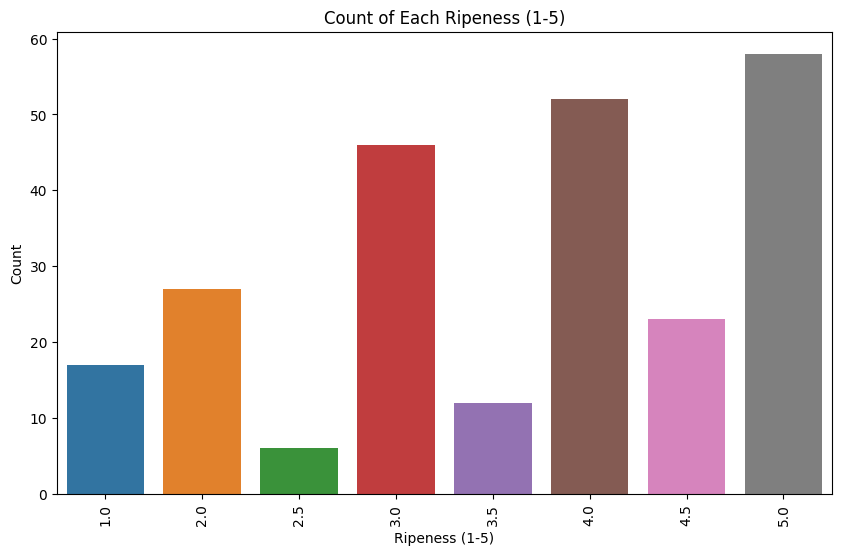

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ripeness (1-5)', y='count', data=Ripeness)
plt.title('Count of Each Ripeness (1-5)')
plt.xlabel('Ripeness (1-5)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**from this graph we can see the most of Ripeness is in 5 and 4 and 3 and five is biggest**


In [20]:
HarvestTime = df.groupby('Ripeness (1-5)')['HarvestTime (days)'].value_counts().reset_index()
HarvestTime

,Ripeness (1-5),HarvestTime (days),count
0,1.0,19,4
1,1.0,11,3
2,1.0,15,2
3,1.0,12,1
4,1.0,13,1
...,...,...,...
96,5.0,17,2
97,5.0,19,2
98,5.0,14,1
99,5.0,16,1


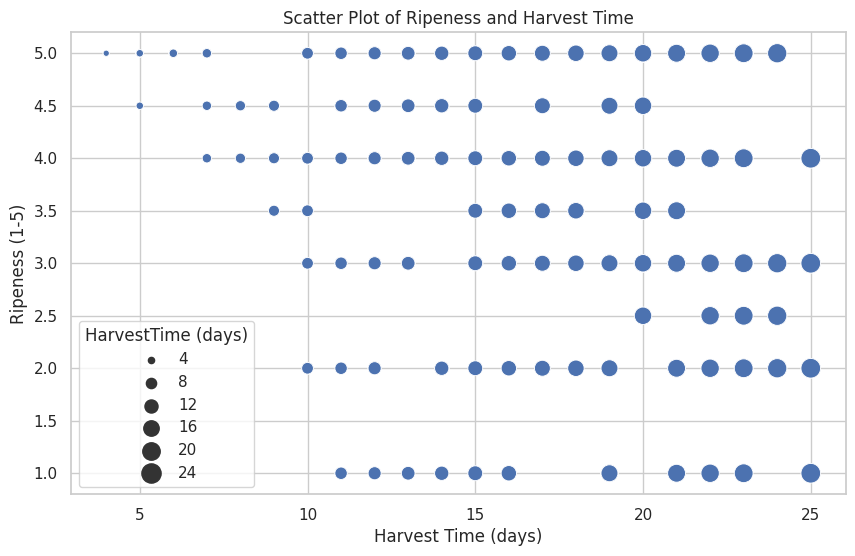

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HarvestTime (days)', y='Ripeness (1-5)', size='HarvestTime (days)', sizes=(20, 200))
plt.title('Scatter Plot of Ripeness and Harvest Time')
plt.xlabel('Harvest Time (days)')
plt.ylabel('Ripeness (1-5)')
plt.show()

**in this graph we can see the num of days orange need to become Ripeness**


In [22]:
Softness = df['Softness (1-5)'].value_counts().reset_index()
Softness

,Softness (1-5),count
0,3.0,47
1,4.0,46
2,5.0,40
3,2.0,39
4,1.0,34
5,2.5,11
6,3.5,8
7,1.5,8
8,4.5,8


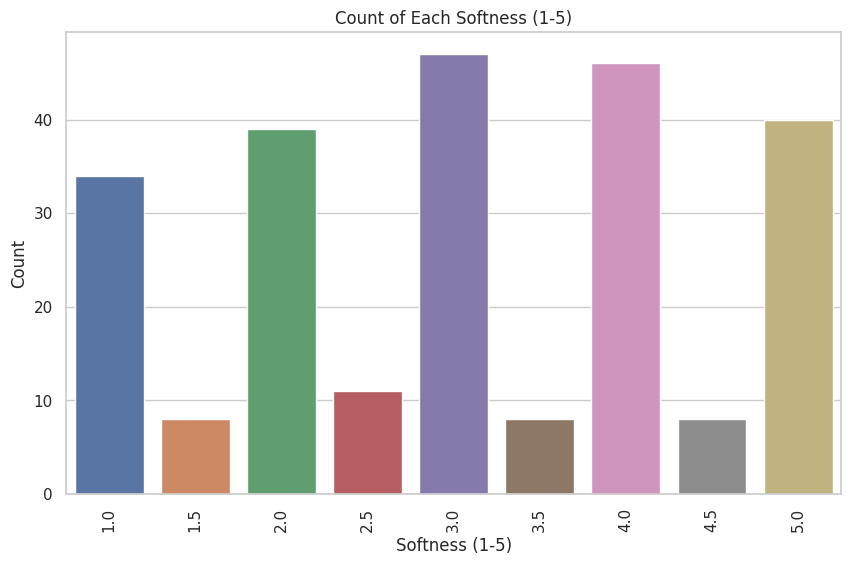

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Softness (1-5)', y='count', data=Softness)
plt.title('Count of Each Softness (1-5)')
plt.xlabel('Softness (1-5)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**we can see the Softness is in 5 and 3 an 1 in start and end and mid of Ripeness**


In [24]:
histogram_labels = ['Size (cm)',
                    'Weight (g)', 
                    'Brix (Sweetness)', 
                    'pH (Acidity)',
                    'Softness (1-5)',
                    'Ripeness (1-5)', 
                    'Quality (1-5)'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

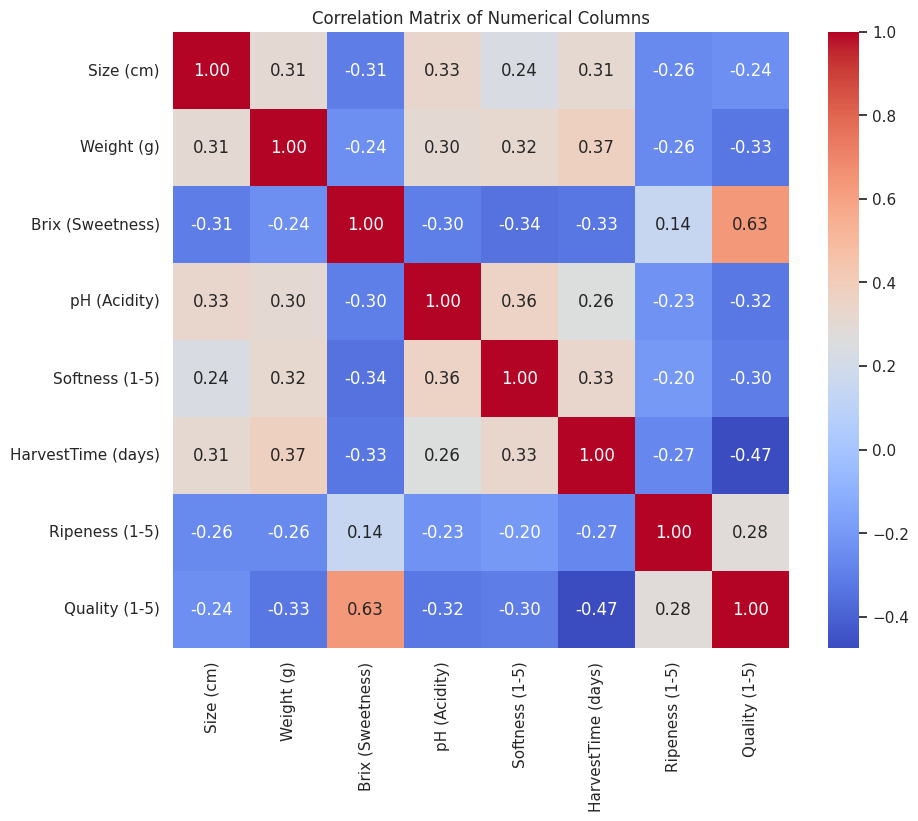

In [25]:
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Preprcessing Data

In [26]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [27]:
label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Variety'] = label_encoder.fit_transform(df['Variety'])
df['Blemishes (Y/N)'] = label_encoder.fit_transform(df['Blemishes (Y/N)'])

# Train Test Split

In [28]:
X=df.drop('Quality (1-5)',axis=1)
y=df['Quality (1-5)']

In [29]:
print("Unique values in y:", np.unique(y))

Unique values in y: [1.  2.  2.5 3.  3.5 4.  4.5 5. ]


In [30]:
thresholds = [1.5,2.5, 3.5, 4.5]

y_discrete = np.digitize(y, bins=thresholds)

In [31]:
X

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5


In [32]:
y

0      4.0
1      4.5
2      5.0
3      3.5
4      4.5
      ... 
236    5.0
237    4.0
238    5.0
239    3.0
240    4.0
Name: Quality (1-5), Length: 241, dtype: float64

In [33]:
X_train, x_test, Y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

In [34]:
X_train

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
115,6.1,279,14.1,3.90,4.0,13,4.0,3,13,4
205,7.5,138,7.0,4.10,1.0,20,3.0,2,13,0
216,7.2,261,8.0,3.30,5.0,21,5.0,2,22,0
132,7.9,155,12.4,3.58,1.0,15,5.0,2,13,0
84,8.9,240,9.0,3.80,4.0,19,3.0,3,9,8
...,...,...,...,...,...,...,...,...,...,...
106,7.4,123,6.7,2.82,1.0,18,5.0,1,4,0
14,9.2,260,9.5,3.70,4.5,20,4.0,3,18,0
92,8.7,230,8.0,3.90,4.0,17,3.5,0,11,0
179,6.9,291,9.9,3.80,5.0,10,4.0,1,17,7


In [35]:
x_test

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
24,7.9,190,10.5,3.10,2.5,12,4.0,2,7,0
6,7.2,160,9.0,3.50,3.5,9,4.0,4,19,0
222,9.4,291,6.3,3.90,4.0,17,2.0,1,4,0
208,7.9,197,13.1,3.20,2.0,14,2.0,0,21,6
236,8.0,194,10.9,3.60,5.0,13,1.0,3,20,8
173,6.8,263,13.4,3.10,4.0,12,5.0,0,13,0
197,8.3,261,13.2,3.80,3.0,22,5.0,0,21,0
220,9.7,280,8.5,4.30,3.0,19,1.0,1,10,10
9,7.8,190,12.0,3.10,2.0,11,4.5,2,8,0
113,6.1,137,12.4,3.54,4.0,20,5.0,2,16,0


In [36]:
Y_train

array([3, 1, 2, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 2, 0, 4, 4, 3, 3, 3,
       2, 3, 2, 1, 2, 4, 0, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 0, 4, 4, 1,
       3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 0, 4, 2, 3, 3, 4, 2, 4, 2, 2,
       4, 3, 2, 4, 3, 3, 4, 4, 3, 2, 4, 1, 3, 2, 3, 3, 3, 3, 4, 4, 4, 3,
       3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 2, 2, 4, 3, 3, 4, 4, 4,
       4, 3, 2, 3, 1, 1, 3, 2, 2, 1, 4, 3, 2, 4, 4, 3, 1, 4, 4, 0, 3, 4,
       2, 4, 4, 3, 3, 3, 3, 4, 3, 2, 3, 4, 4, 4, 4, 3, 0, 2, 3, 4, 3, 0,
       3, 4, 2, 3, 4, 4, 2, 3, 3, 3, 3, 3, 2, 0, 3, 4, 4, 0, 1, 3, 3, 3,
       2, 4, 2, 2, 3, 3, 2, 3, 2, 3, 4, 2, 3, 3, 2, 1])

In [37]:
y_test

array([4, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4,
       1, 4, 3, 3, 2, 4, 4, 3, 1, 3, 3, 4, 1, 2, 4, 3, 3, 4, 4, 2, 4, 3,
       4, 3, 2, 4, 3])

# Building Model

<h2>RandomForestClassifier<h2>

In [38]:
randforest = RandomForestClassifier(n_estimators=50)

In [39]:
randforest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
randforest.score(X_train, Y_train)

1.0

In [41]:
randforest.score(x_test, y_test)


0.7551020408163265

In [42]:
y_pred = randforest.predict(x_test)
y_pred

array([4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4,
       1, 4, 3, 3, 2, 4, 4, 3, 1, 2, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3,
       4, 3, 2, 4, 3])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.67      0.33      0.44         6
           3       0.69      0.86      0.77        21
           4       0.83      0.79      0.81        19

    accuracy                           0.76        49
   macro avg       0.80      0.66      0.71        49
weighted avg       0.76      0.76      0.75        49



<h2>DecisionTreeClassifier<h2>

In [44]:
dectree = DecisionTreeClassifier()

In [45]:
dectree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [46]:
dectree.score(X_train,Y_train)

1.0

In [47]:
dectree.score(x_test,y_test)

0.5102040816326531

In [48]:
y_pred = dectree.predict(x_test)
y_pred

array([4, 4, 1, 3, 3, 3, 3, 3, 2, 4, 4, 3, 4, 3, 3, 0, 3, 4, 3, 4, 3, 4,
       3, 4, 4, 1, 2, 4, 2, 3, 0, 0, 3, 4, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3,
       4, 3, 1, 4, 2])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       0.20      0.17      0.18         6
           3       0.57      0.57      0.57        21
           4       0.71      0.63      0.67        19

    accuracy                           0.51        49
   macro avg       0.30      0.27      0.28        49
weighted avg       0.54      0.51      0.53        49



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



<h2>LogisticRegression<h2>

In [50]:
logreg = LogisticRegression()

In [51]:
logreg.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
logreg.score(X_train,Y_train)

0.6666666666666666

In [53]:
logreg.score(x_test,y_test)

0.6530612244897959

In [54]:
y_pred = logreg.predict(x_test)
y_pred

array([4, 4, 2, 3, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 2, 3, 3, 4, 2, 4, 2, 4,
       1, 4, 3, 2, 2, 4, 4, 3, 1, 2, 2, 4, 2, 4, 4, 3, 4, 3, 4, 4, 3, 2,
       3, 3, 2, 4, 3])

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.33      0.67      0.44         6
           3       0.73      0.52      0.61        21
           4       0.75      0.79      0.77        19

    accuracy                           0.65        49
   macro avg       0.70      0.66      0.66        49
weighted avg       0.71      0.65      0.66        49

